In [112]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from tqdm import tqdm

In [197]:
class partícula:
    def __init__(self,r0,v0,a0,t,m=1,rad=2.,Id=0):
        self.dt=t[1]-t[0]
        self.r=r0
        self.v=v0
        self.a=a0
        self.m=m
        self.rad=rad
        self.Id=Id
        self.p=self.m*self.v
        self.f=self.m*self.a
        self.u=0
        
        self.R=np.zeros((len(t),len(r0)))
        self.V=np.zeros_like(self.R)
        self.A=np.zeros_like(self.R)
        self.F = np.zeros_like(self.R)
        self.P = np.zeros_like(self.R)
        self.K=20
        self.VEk=np.zeros(len(t))
        self.U=np.zeros_like(self.VEk)
    def evolución(self,i):
        self.Set_pos(i)
        self.Set_vel(i)
        self.a=self.f/self.m
    #Euler-Cromer
        self.r +=self.dt * self.v
        self.v +=self.dt * self.a    
    def Calcular_fuerza(self,p):
        d=np.linalg.norm(self.r - p.r)
        compresión=self.rad+p.rad-d
        if compresión>=0:
            F=self.K*compresión**3
            self.n=(self.r-p.r)/d
            self.f=np.add(self.f,F*self.n)
            self.u=0.125*self.K*compresión**4
    def reset_F(self):
        self.f[:]=0
        self.a[:]=0
    def Set_pos(self,i):
        self.R[i]=self.r
    def Set_vel(self,i):
        self.V[i]=self.v
        self.P[i]=self.v*self.m
        self.VEk[i]=0.5*self.m*np.dot(self.v,self.v)
        self.U[i]=self.u
    def Get_pos(self,scale=200):
        return self.R[::scale]
    def Get_vel(self,scale=200):
        return self.P[::scale]
    def Get_P(self,scale=200):
        return self.P[::scale]
    def Get_Ke(self,scale=200):
        return self.VEk[::scale]
    def Get_u(self,scale=200):
        return self.U[::scale]
    # def Límites(self):
    #     for i in range(2):
    #        if self.r[i]+self.rad>20 and self.v[i]>0:
    #           self.v[i]=-self.v[i]
        #    elif self.r[i]-self.rad<-20 and self.v[i]<0:
        #       self.v[i]=-self.v[i]

In [198]:
def Get_partículas(N,t):
    #montecarlo para v y r aleatorias
    Partículas=[]
    for i in range(N):
        r0 = np.array([np.random.uniform(-20,20),np.random.uniform(-20,20)])
        v0 = np.array([np.random.uniform(-5,5),np.random.uniform(-5,5)])
        a0 = np.array([0.,0.])
        p0 = partícula(r0,v0,a0,t)
        Partículas.append(p0)
    return Partículas

In [199]:
dt=0.001
tf=10
t=np.arange(0,tf,dt)
Partículas=Get_partículas(10,t)

In [200]:
def Run_simulación(t,Partículas):
    for it in tqdm(range(len(t)),desc='Corriendo simulación',unit=' Steps'):
        for i in range(len(Partículas)):
            for j in range(len(Partículas)):
                if i!=j:
                    Partículas[i].Calcular_fuerza(Partículas[j])
        for i in range(len(Partículas)):
                Partículas[i].evolución(it)
                Partículas[i].reset_F()
               #Particles[i].CheckLimits()
    return Partículas

In [201]:
Partículas=Run_simulación(t, Partículas)

Corriendo simulación: 100%|█████████████████████████████████████████████████| 10000/10000 [00:19<00:00, 505.25 Steps/s]


In [202]:
scale=200
t_nuevo=t[::scale]

<IPython.core.display.Javascript object>


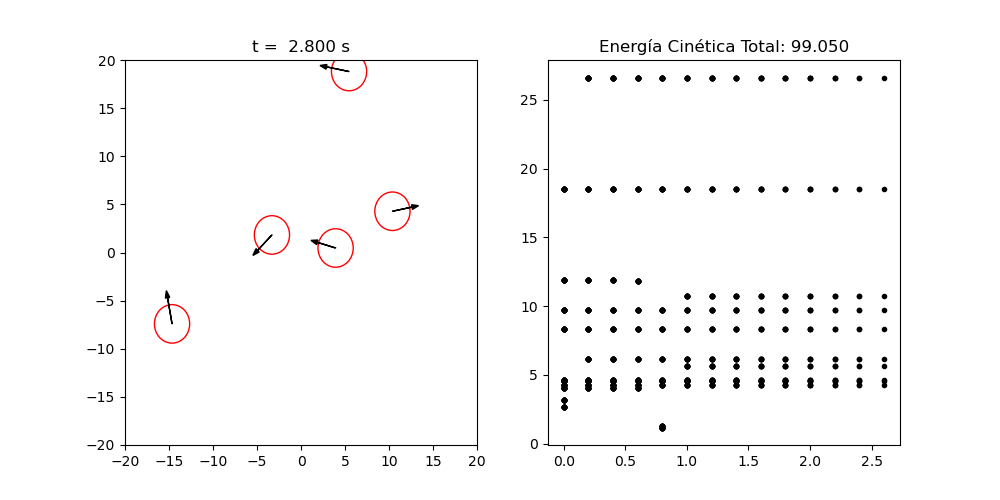

In [203]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(121)
ax1 = fig.add_subplot(122)
def init():
    
    ax.clear()
    ax.set_xlim(-20,20)
    ax.set_ylim(-20,20)
    
def Update(i):
    
    init()
    ax.set_title(r't =  %.3f s' %(t_nuevo[i]))
    
    
    # Queremos calcular la energía total de cinética
    KE = 0.
    
    for p in Partículas:
        
        x = p.Get_pos(scale)[i,0]
        y = p.Get_pos(scale)[i,1]
        
        vx = p.Get_vel(scale)[i,0]
        vy = p.Get_vel(scale)[i,1]
        
        círculo = plt.Circle( (x,y), p.rad, color='r', fill=False )
        ax.add_patch(círculo)
        
        ax.arrow(x,y,vx,vy,color='k',head_width=0.5,length_includes_head=True)
        
        KE += p.Get_Ke(scale)[i]
        
        ax1.set_title(r'Energía Cinética Total: {:.3f}'.format(KE))
        ax1.scatter(t_nuevo[:i], p.Get_Ke(scale)[:i],color='k',marker='.')
        
Animation = anim.FuncAnimation(fig,Update,frames=len(t_nuevo),init_func=init)

<IPython.core.display.Javascript object>


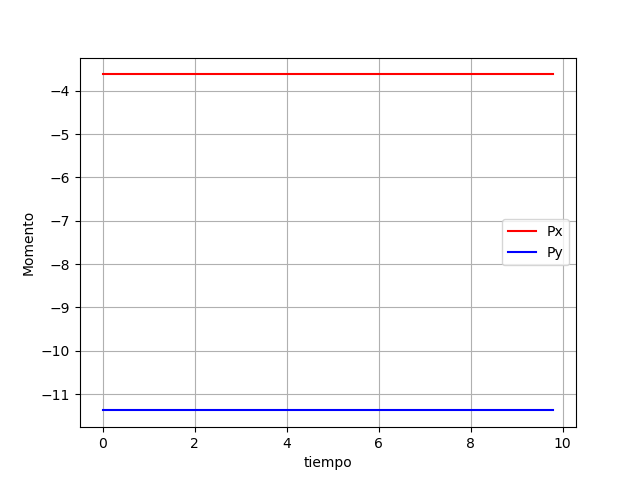

In [212]:
Momento=Partículas[0].Get_P(scale=200)
for i in range(1,len(Partículas)):
    Momento=np.add(Momento,Partículas[i].Get_P(scale=200))
plt.plot(t_nuevo,Momento[:,0],color='r',label='Px')
plt.plot(t_nuevo,Momento[:,1],color='Blue',label='Py')
plt.xlabel('tiempo')
plt.ylabel('Momento')
plt.legend()
plt.grid()
plt.show()

<IPython.core.display.Javascript object>


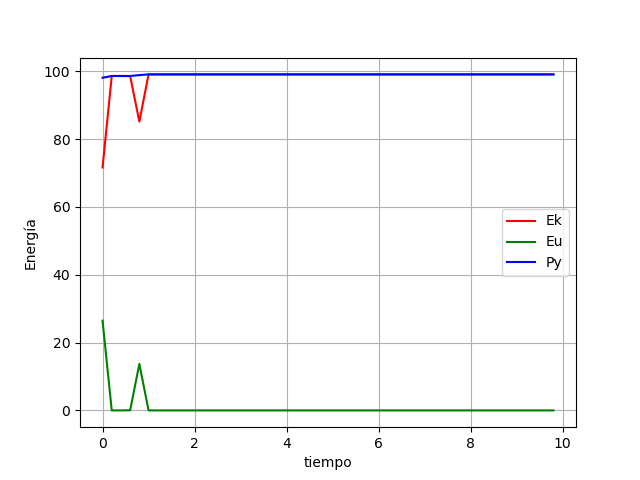

In [213]:
Ek=Partículas[0].Get_Ke(scale=200)
Eu=Partículas[0].Get_u(scale=200)
Em=Ek+Eu
for i in range(1,len(Partículas)):
    Ek=np.add(Ek,Partículas[i].Get_Ke(scale=200))
    Eu=np.add(Eu,Partículas[i].Get_u(scale=200))
    Em=Ek+Eu
plt.plot(t_nuevo,Ek,color='r',label='Ek')
plt.plot(t_nuevo,Eu,color='g',label='Eu')
plt.plot(t_nuevo,Em,color='Blue',label='Em')
plt.xlabel('tiempo')
plt.ylabel('Energía')
plt.legend()
plt.grid()
plt.show()

<IPython.core.display.Javascript object>


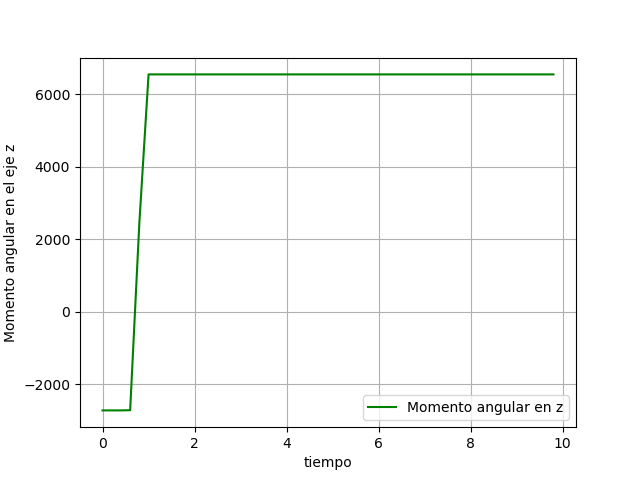

In [223]:
r=Partículas[0].Get_pos(scale=200)
Momentos=Partículas[0].Get_P(scale=200)
for i in range(1,len(Partículas)):
    r=np.add(r,Partículas[0].Get_pos(scale=200))
    Momentos=np.add(Momentos,Partículas[0].Get_P(scale=200))
    Momento_ang=np.cross(r,Momentos)
plt.plot(t_nuevo,Momento_ang,color='g',label='Momento angular en z')
plt.xlabel('tiempo')
plt.ylabel('Momento angular en el eje z')
plt.legend()
plt.grid()
plt.show()